In [133]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression

%matplotlib inline

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [95]:
# сгенерируем набор данных
data1, target, coef = datasets.make_regression(n_samples=500, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
data1[:,0] = data1[:,0]*10

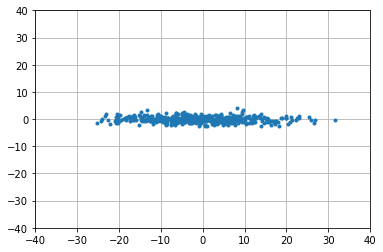

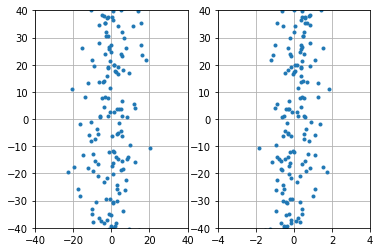

In [96]:
plt.plot(data1[:,0],data1[:,1], '.')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.grid(True)
plt.show()
plt.subplot(1,2,1)
plt.plot(data1[:,0],target, '.')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(data1[:,1],target, '.')
plt.xlim((-4,4))
plt.ylim((-40,40))
plt.grid(True)

plt.show()

In [120]:
# Отмасштабируем получившиеся признаки

# Получим средние значения и стандартное отклонение по столбцам
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [121]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [127]:
def stochastic(X, Y, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8):
    # инициализируем начальный вектор весов
    w = np.random.randn(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0
    lamb = 0.01 
    np.random.seed(1234)

    Q = [mserror(X, w, Y)]  
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta/(0+1) * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) #/target.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))
        Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    
    return w_list, errors

In [128]:
def gradient(X, Y, w, eta = 0.01, max_iter = 1e3, min_weight_dist = 1e-8):

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    # ход градиентного спуска
    while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
        # новый вес w
        new_w = w - 2 * eta/1 * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]#(iter_num*0.01+1)
        # оценка расстояния по эвклиду между старым и новым состоянием w
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append([iter_num]+new_w.copy().tolist())
        errors.append(mserror(X, new_w, Y))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

    return w_list, errors

In [129]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_gradient = gradient(data, target, w, eta = 0.01, max_iter = 1e4, min_weight_dist = 1e-8)

В случае использования градиентного спуска функционал ошибки составляет 79.5827


<ipython-input-128-1f1159bff5d1>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  w_list = np.array(w_list)


In [125]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_stochastic = stochastic(data, target, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8)

В случае использования стохастического градиентного спуска функционал ошибки составляет 80.1792


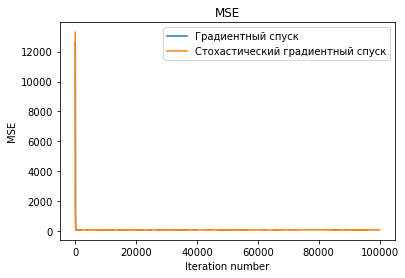

In [126]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(w_gradient[1])), w_gradient[1], label="Градиентный спуск")
plt.plot(range(len(w_stochastic[1])), w_stochastic[1], label="Стохастический градиентный спуск")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Теоретически скорость сходимости у обычного градиентного спуска должна быть больше, но у меня какой-то странный график получается

2. Модифицировать решение первого задания путем добавления L2-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [130]:
def stochastic_L2(X, Y, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8, lambda_two = 1e-8):
    # инициализируем начальный вектор весов
    w = np.random.randn(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0
    lamb = 0.001 
    np.random.seed(1234)

    Q = [mserror(X, w, Y)]  
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0] + lambda_two * w**2

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))
        Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    
    return w_list, errors

In [131]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_stochastic_l2 = stochastic_L2(data, target, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8)

В случае использования стохастического градиентного спуска функционал ошибки составляет 79.9713


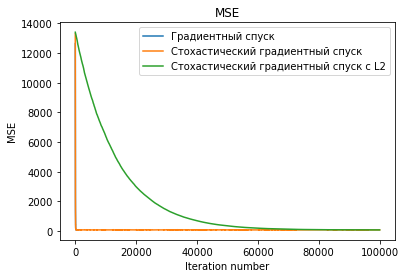

In [132]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(w_gradient[1])), w_gradient[1], label="Градиентный спуск")
plt.plot(range(len(w_stochastic[1])), w_stochastic[1], label="Стохастический градиентный спуск")
plt.plot(range(len(w_stochastic_l2[1])), w_stochastic_l2[1], label="Стохастический градиентный спуск c L2")

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Если добавить регуляризацию L2, то скорость несколько уменьшилась, зато выросла точность модели